In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!/usr/bin/env python

#  Author: Angela Chapman
#  Date: 8/6/2014
#
#  This file contains code to accompany the Kaggle tutorial
#  "Deep learning goes to the movies".  The code in this file
#  is for Part 1 of the tutorial on Natural Language Processing.
#
# *************************************** #
%matplotlib inline
import os
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from KaggleWord2VecUtility import KaggleWord2VecUtility
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

file = '/Users/david/notebooks/'
print (os.path.join(os.path.dirname(file), 'data', 'labeledTrainData.tsv'))
print (os.path.dirname(file))
train = pd.read_csv(os.path.join(os.path.dirname(file), 'data', 'labeledTrainData.tsv'), header=0, \
                delimiter="\t", quoting=3)
test = pd.read_csv(os.path.join(os.path.dirname(file), 'data', 'testData.tsv'), header=0, delimiter="\t", \
               quoting=3 )

/Users/david/notebooks/data/labeledTrainData.tsv
/Users/david/notebooks


In [69]:
rev = '7708_10'
rev_Str = '"{0}"'.format(rev)
print(rev_Str)
print(train[train["id"] ==rev_Str]["review"].values)
#train["id"] == "5814_8"
#train["id"][0]

"7708_10"
[ '"Shakespeare\'s \\"The Tempest\\" is a model for this exceptional science fiction film. We look for differences. Prospero and his daughter, Miranda, are stranded on a Mediterranean island.\\" Morbius and Altaira are marooned on the 4th planet circling the star Altair. Ariel is a spirit. Robby the Robot is a man-made servant. Caliban\'s evil hardly approaches that of Monsters of the Id. Shakespeare spares Prospero. Morbius dies when Altair 4 blows up. \\"The Tempest\\" is a comedy. \\"Forbidden Planet\\" is a tragedy. We wonder if mankind must suffer the fate of the Krell in some future time. Anne Francis is Altaira. Jack Kelly is Lieutentant Farman. Kelly starred with James Garner in the comedy/western TV series, \\"Maverick.\\""']


In [99]:


#print( 'The first review is:')
#print (train["review"][0])

#raw_input("Press Enter to continue...")


#print ('Download text data sets. If you already have NLTK datasets downloaded, just close the Python download window...')
#nltk.download()  # Download text data sets, including stop words

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list

print ("Cleaning and parsing the training set movie reviews...\n")
for i in range( 0, len(train["review"])):
    clean_train_reviews.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(train["review"][i], True)))

#KaggleWord2VecUtility.review_to_wordlist(train["review"][0], True)

Download text data sets. If you already have NLTK datasets downloaded, just close the Python download window...
Cleaning and parsing the training set movie reviews...



['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

In [ ]:
KaggleWord2VecUtility.review_to_wordlist(train["review"][0], True)

In [85]:
# ****** Create a bag of words from the training set
#
print ("Creating the bag of words...\n")


# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",   \
                         tokenizer = None,    \
                         preprocessor = None, \
                         stop_words = None,   \
                         max_features = 5000)

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()
# Numpy arrays are eas

Creating the bag of words...



In [88]:
#y to work with, so convert the result to an
# array

train

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [71]:
# ******* Train a random forest using the bag of words
#
print ("Training the random forest (this may take a while)...")


# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Creating the bag of words...

Training the random forest (this may take a while)...


In [74]:
# Create an empty list and append the clean reviews one by one
clean_test_reviews = []

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,len(test["review"])):
    clean_test_reviews.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(test["review"][i], True)))

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
print ("Predicting test labels...\n")
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
#output.to_csv(os.path.join(os.path.dirname(file), 'data', 'Bag_of_Words_model.csv'), index=False, quoting=3)
#print ("Wrote results to Bag_of_Words_model.csv")


Cleaning and parsing the test set movie reviews...

Predicting test labels...



,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1
5,"""2913_8""",0
6,"""4396_1""",0
7,"""395_2""",1
8,"""10616_1""",0
9,"""9074_9""",0


[[12500     0]
 [    0 12500]]


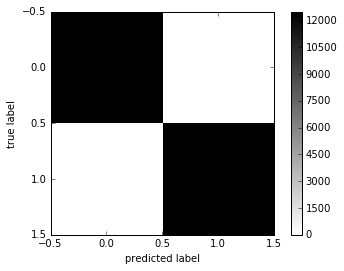

In [98]:
train_ouput = forest.predict(train_data_features)
cm = confusion_matrix(train_ouput, train["sentiment"])

plt.imshow(cm,
       interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");
print (cm)